In [1]:
import pandas as pd
import pandapower as pp 
from tqdm import tqdm, tqdm_notebook

In [2]:
%cd C:\\Users\\sebsa\\Documents\\Centrale Paris\\3A\\OEN\\Projet Synthese

C:\Users\sebsa\Documents\Centrale Paris\3A\OEN\Projet Synthese


## Read data

In [3]:
path = 'data/buses_formatted_with_capacity_and_ASUpower.csv'
buses = pd.read_csv(path, index_col=0)
buses.sort_values('bus_id', inplace=True)
buses.head()

,bus_id,station_id,voltage,dc,symbol,lon,lat,electrical_capacity_solar,electrical_capacity_wind,Nominal_Power_ASU
0,1,2,380.0,f,Substation,43.714600,36.129002,225.12687,0.0,0.0
1,2,3,380.0,f,Substation,43.967285,35.460670,0.00000,0.0,0.0
2,3,4,380.0,f,Substation,44.813232,31.456782,0.00000,0.0,0.0
3,4,5,380.0,f,Substation,43.967285,32.184911,0.00000,0.0,0.0
4,5,6,380.0,f,Substation,44.011230,32.704111,0.00000,0.0,0.0


In [4]:
path = 'data/reseau/links_formatted.csv'
links = pd.read_csv(path, index_col=0)
links.head()

,src_bus_id,dst_bus_id,voltage,circuits,dc,underground,under_construction,length_m,tags,geometry
4,1,2,380.0,1,f,f,f,77701.030928,"'""text_""=>"" ""","""symbol""=>""380-400 kV Transmission Line"
11875,3,4,380.0,1,f,f,f,119309.010354,NaN,'LINESTRING(44.813232 31.456782
11,4,5,380.0,2,f,f,f,59205.386857,"'""text_""=>"" ""","""symbol""=>""380-400 kV Transmission Line"
10,5,6,380.0,2,f,f,f,91727.865688,"'""text_""=>"" ""","""symbol""=>""380-400 kV Transmission Line"
8,6,8,380.0,1,f,f,f,30118.378222,"'""text_""=>"" ""","""symbol""=>""380-400 kV Transmission Line"


## Create network

In [5]:
net = pp.create_empty_network(name='network_test_1')

In [7]:
for index, row in tqdm_notebook(buses.iterrows()):
    bus = pp.create_bus(net, vn_kv=row['voltage'], name=row['bus_id'], geodata=(row['lon'],row['lat']))
    gen_cap = 1000 * (row['electrical_capacity_solar'] + row['electrical_capacity_wind'])
    ASU_cap = 1000 * row['Nominal_Power_ASU']
    if ASU_cap != 0.:
        pp.create_load(net, bus=bus, p_kw=ASU_cap)
    if gen_cap != 0.:
        pp.create_gen(net, bus=bus, p_kw=-gen_cap)

In [9]:
pp.create_ext_grid(net, bus=1, name="Grid Connection")

0

In [10]:
net

This pandapower network includes the following parameter tables:
   - bus (7893 elements)
   - load (83 elements)
   - gen (2947 elements)
   - ext_grid (1 elements)
   - bus_geodata (7893 elements)

In [11]:
net.bus.head()

,name,vn_kv,type,zone,in_service
0,1,380.0,b,None,True
1,2,380.0,b,None,True
2,3,380.0,b,None,True
3,4,380.0,b,None,True
4,5,380.0,b,None,True


In [12]:
for index, row in tqdm_notebook(links.iterrows()):
    line = pp.create_line(net, 
                          from_bus=row['src_bus_id']-1,
                          to_bus=row['dst_bus_id']-1, 
                          length_km=row['length_m']/1000,
                          std_type="N2XS(FL)2Y 1x300 RM/35 64/110 kV")

In [13]:
net

This pandapower network includes the following parameter tables:
   - bus (7893 elements)
   - load (83 elements)
   - gen (2947 elements)
   - ext_grid (1 elements)
   - line (9784 elements)
   - bus_geodata (7893 elements)

In [14]:
net.bus.head()

,name,vn_kv,type,zone,in_service
0,1,380.0,b,None,True
1,2,380.0,b,None,True
2,3,380.0,b,None,True
3,4,380.0,b,None,True
4,5,380.0,b,None,True


In [15]:
net.line[net.line.to_bus==176]

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,max_i_ka,df,parallel,type,in_service
131,None,N2XS(FL)2Y 1x300 RM/35 64/110 kV,171,176,47.823502,0.06,0.144,144.0,0.588,1.0,1,cs,True
132,None,N2XS(FL)2Y 1x300 RM/35 64/110 kV,170,176,9.081982,0.06,0.144,144.0,0.588,1.0,1,cs,True
133,None,N2XS(FL)2Y 1x300 RM/35 64/110 kV,175,176,10.519280,0.06,0.144,144.0,0.588,1.0,1,cs,True
134,None,N2XS(FL)2Y 1x300 RM/35 64/110 kV,174,176,66.675227,0.06,0.144,144.0,0.588,1.0,1,cs,True


In [16]:
net.load.sort_values('bus').head()

,name,bus,p_kw,q_kvar,const_z_percent,const_i_percent,sn_kva,scaling,in_service,type
0,None,176,9619.321791,0.0,0.0,0.0,NaN,1.0,True,None
1,None,213,10289.817054,0.0,0.0,0.0,NaN,1.0,True,None
2,None,230,1707.689685,0.0,0.0,0.0,NaN,1.0,True,None
3,None,419,814.057862,0.0,0.0,0.0,NaN,1.0,True,None
4,None,423,719.383434,0.0,0.0,0.0,NaN,1.0,True,None


In [17]:
net.gen.iloc[30:40]

,name,bus,p_kw,vm_pu,sn_kva,min_q_kvar,max_q_kvar,scaling,in_service,type
30,None,136,-244400.0,1.0,NaN,NaN,NaN,1.0,True,None
31,None,137,-20000.0,1.0,NaN,NaN,NaN,1.0,True,None
32,None,138,-51230.0,1.0,NaN,NaN,NaN,1.0,True,None
33,None,139,-109330.0,1.0,NaN,NaN,NaN,1.0,True,None
34,None,140,-182750.0,1.0,NaN,NaN,NaN,1.0,True,None
35,None,142,-328000.0,1.0,NaN,NaN,NaN,1.0,True,None
36,None,143,-88970.0,1.0,NaN,NaN,NaN,1.0,True,None
37,None,144,-20000.0,1.0,NaN,NaN,NaN,1.0,True,None
38,None,145,-367750.0,1.0,NaN,NaN,NaN,1.0,True,None
39,None,146,-168300.0,1.0,NaN,NaN,NaN,1.0,True,None


In [18]:
pp.runpp(net, max_iteration=100)

C:\Anaconda\lib\site-packages\pandapower\build_branch.py:147: RuntimeWarning: divide by zero encountered in true_divide
  t[:, 2] = line["r_ohm_per_km"].values * length / baseR / parallel
C:\Anaconda\lib\site-packages\pandapower\build_branch.py:148: RuntimeWarning: divide by zero encountered in true_divide
  t[:, 3] = line["x_ohm_per_km"].values * length / baseR / parallel


In [19]:
total_load = net.load.p_kw.sum()
total_gen = net.gen.p_kw.sum()
diff_gen_load = abs(total_gen - total_load)
print('Total load: {} MW'.format(total_load/1000))
print('Total prod: {} MW'.format(total_gen/1000))
print('Difference prod-load: {} MW'.format(diff_gen_load/1000))

Total load: 228.66953008314476 MW
Total prod: -279031.7179400003 MW
Difference prod-load: 279260.3874700834 MW


In [20]:
net.res_bus.p_kw.describe()

count    7.893000e+03
mean    -2.938770e+02
std      2.371026e+04
min     -2.094444e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: p_kw, dtype: float64

In [21]:
net.res_bus.head(10)

,vm_pu,va_degree,p_kw,q_kvar
0,1.000000e+00,-2.995237,-2.251269e+05,-1.050141e+06
1,1.000000e+00,0.000000,-2.094444e+06,-1.311486e+06
2,4.718794e-07,163.185760,0.000000e+00,0.000000e+00
3,3.450694e-07,-1.473529,0.000000e+00,0.000000e+00
4,5.691526e-07,-8.590564,0.000000e+00,0.000000e+00
5,6.791818e-07,-20.857042,0.000000e+00,0.000000e+00
6,7.050361e-07,-24.879036,0.000000e+00,0.000000e+00
7,7.000663e-07,-23.033795,0.000000e+00,0.000000e+00
8,7.013102e-07,-26.048766,0.000000e+00,0.000000e+00
9,2.324837e-07,-6.915952,0.000000e+00,0.000000e+00


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

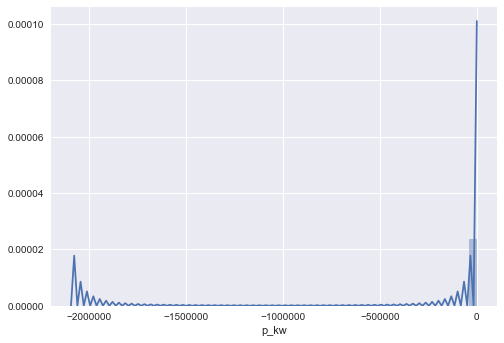

In [23]:
sns.set(color_codes=True)

sns.distplot(net.res_bus.p_kw.iloc[1:])
# sns.plt.title('Repartition of the distance between ASU and closest bus')
# sns.plt.xlabel('Distance in km')
# sns.plt.ylabel('Density')

In [24]:
import pandapower.plotting as plot
import pandapower.networks as nw

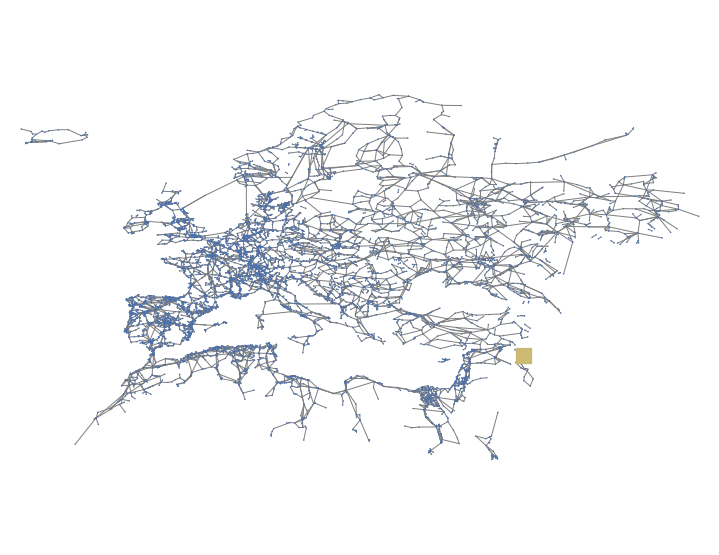

In [25]:
plot.simple_plot(net, bus_size=0.1)